<a href="https://colab.research.google.com/github/abhayxshukla/AIprediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM


In [ ]:
df = yf.download('AAPL', start='2010-01-01', end='2024-01-01')
df = df[['Close']]  # Use only the closing price
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2010-01-04,6.440331
2010-01-05,6.451467
2010-01-06,6.348847
2010-01-07,6.337110
2010-01-08,6.379240


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)


In [ ]:
X, y = [], []
time_steps = 60  # 60 days of past data

for i in range(time_steps, len(df_scaled)):
    X.append(df_scaled[i-time_steps:i, 0])  # Last 60 days
    y.append(df_scaled[i, 0])  # Target value

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for CNN


In [ ]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 27, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 13, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 832)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          41,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,309 (212.14 KB)

 Trainable params: 54,309 (212.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
split = int(0.8 * len(X))  # 80% train, 20% test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the CNN model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0102 - val_loss: 0.0063
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.9092e-04 - val_loss: 0.0022
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.6687e-04 - val_loss: 0.0021
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 7.5997e-04 - val_loss: 0.0031
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.2692e-04 - val_loss: 0.0020
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.3421e-04 - val_loss: 0.0139
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.8491e-04 - val_loss: 0.0020
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.8657e-04 - val_loss: 0.0029
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2239e-04 - val_loss: 0.0036
Epoch 12/20
87/87 ━━━━━━━━━━━━━━

In [ ]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


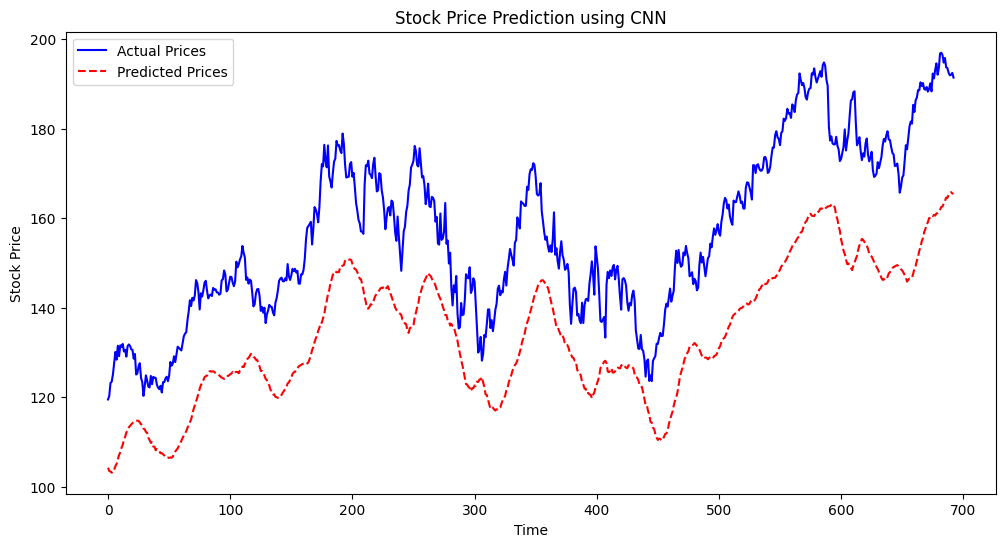

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', linestyle='dashed', label='Predicted Prices')
plt.legend()
plt.title('Stock Price Prediction using CNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()
